# Introduction to Logistic Regression

Logistic Regression is a fundamental algorithm for classification tasks. Unlike Linear Regression, which is used for predicting continuous variables, Logistic Regression is used to predict categorical outcomes. The most common application is binary classification, where the goal is to classify observations into one of two classes.

---

## Table of Contents

1. [What is Logistic Regression?](#1-what-is-logistic-regression)
2. [Sigmoid Function](#2-sigmoid-function)
3. [Logistic Regression Formula](#3-logistic-regression-formula)
4. [Implementing Logistic Regression in Python](#4-implementing-logistic-regression-in-python)
5. [Model Evaluation Metrics](#5-model-evaluation-metrics)

---

## 1. What is Logistic Regression?

Logistic Regression is used for binary classification problems where the target variable is categorical (often 0 or 1). It uses a logistic (sigmoid) function to model the probability of a certain class.

The key difference from Linear Regression is that the output is mapped to a probability value between 0 and 1 using the sigmoid function.

---

## 2. Sigmoid Function

The logistic (or sigmoid) function is:

**σ(z) = 1 / (1 + e^(-z))**

Where:
- **z**: The linear combination of inputs and coefficients (similar to Linear Regression)
- **σ(z)**: The probability that the output belongs to a particular class.

---

## 3. Logistic Regression Formula

Logistic Regression models the probability of the dependent variable **y** (for binary classification) as:

**P(y = 1 | x) = σ(w₀ + w₁x₁ + w₂x₂ + ... + wₙxₙ)**

Where:
- **P(y = 1 | x)**: The probability of class 1 given input features **x**
- **w₀, w₁, ..., wₙ**: The model parameters (intercept and coefficients)
- **x₁, x₂, ..., xₙ**: The independent variables (features)

The predicted class is then assigned based on a decision boundary, often set at 0.5.

---

## 4. Implementing Logistic Regression in Python

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import numpy as np
from scipy.stats import zscore
import pandas as pd


In [20]:
X,y = make_classification(n_samples=3000,n_classes=2)

In [25]:
data = pd.DataFrame(data=X)
data["target"] = y

z_scores = np.abs(zscore(X))
data = data[(z_scores<3).all(axis = 1)]

X = data.drop(columns=["target"])
y = data["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=42)

smote = SMOTE()
X_smote,y_smote = smote.fit_resample(X_train,y_train)


model = LogisticRegression()
model.fit(X_smote,y_smote)

y_pred = model.predict(X_test)

## 5. Model Evaluation Metrics

Accuracy: 94.58%
Confusion Matrix:
[[391  36]
 [ 10 412]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.94       427
           1       0.92      0.98      0.95       422

    accuracy                           0.95       849
   macro avg       0.95      0.95      0.95       849
weighted avg       0.95      0.95      0.95       849



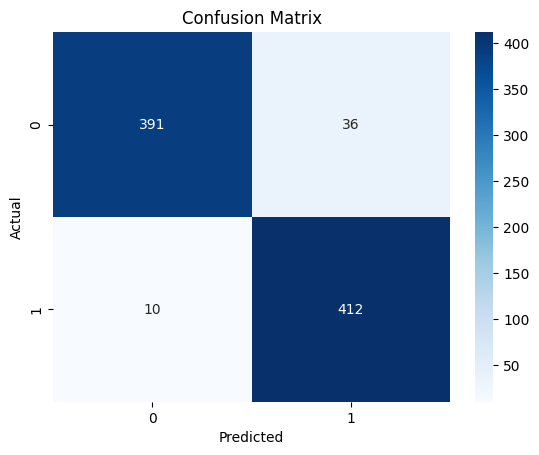

In [26]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
